#Importacion de librerias
##import pandas as pd:

pandas es una biblioteca de Python para la manipulación y análisis de datos. Se utiliza para trabajar con estructuras de datos como DataFrames. Aquí se importa con el alias pd para simplificar su uso.
##import numpy as np:

numpy es una biblioteca para operaciones matemáticas y científicas en Python, especialmente para trabajar con arrays y matrices. Se importa con el alias np.
##import matplotlib.pyplot as plt:

matplotlib.pyplot es un módulo de la biblioteca matplotlib que proporciona funciones para crear gráficos y visualizaciones. Se importa con el alias plt.
##import seaborn as sbn:

seaborn es una biblioteca para la visualización de datos basada en matplotlib, que ofrece una interfaz de alto nivel para crear gráficos estadísticos. Se importa con el alias sbn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Este código carga tres archivos CSV en DataFrames: gender_submission.csv en df_gender, train.csv en df_train, y test.csv en df_test. Luego, imprime la forma (número de filas y columnas) del DataFrame df_gender y muestra las primeras 5 filas de df_gender para inspeccionar su contenido y estructura.

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
count_na = df_train.isna().sum()
print('Cantidad de valores NaN en datos de entrenamiento:\n', count_na)

Cantidad de valores NaN en datos de entrenamiento:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df_train.shape

(891, 12)

En la columna de edad, hay 177 valores faltantes de un total de 891, lo que equivale al 19.86% de los datos en esa columna. Se consideraron dos cursos de acción para abordar este problema: imputación de datos o eliminación. Tras evaluar el modelo en ambos escenarios, se escogerá el que tenga mejor precisión. Para la imputación, utilizamos la mediana, agrupando los datos por clase y sexo, y así obtener la mediana de cada grupo. Esta se usó para llenar los datos faltantes, con cerca de seis combinaciones diferentes. Este método se consideró adecuado debido a la menor proporción de información faltante en esta columna.

La columna de cabina se eliminará dado que faltan 687 de 891 datos (77.1%), además de que esta columna no tiene mucha relevancia en los datos como otras columnas como lo son la edad, sexo, clase, etc. Bajo este mismo concepto, se eliminarán las columnas "Ticket" y "PassengerId" (esto dado que el numero de ticket realmente no significa mucho y el numero de pasajero es básicmanete como viene ordenado el dataset, por lo que tampoco aporta mucho).

In [ ]:
df_train = df_train.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)

In [ ]:
print(df_train.shape)
df_train.head()

(891, 9)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
# Mapear los valores de 'Sex' a 0 para 'male' y 1 para 'female'
df_train['Sex bool'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex bool
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


Ahora que ya tenemos la columna 'Sex bool' con datos numéricos para categorizar el sexo en solo 0 o 1, se puede proceder a eliminar la columna 'sex' para evitar tener datos redundantes o repetidos, dejando solo lo necesario para que funcione de buena manera nuestro modelo.

In [ ]:
df_train = df_train.drop(['Sex'], axis=1)

## Procesamiento de datos

Como muchos modelos de aprendizaje no pueden trabajar directamente con categorias y nuestro feature de Embarked clasifica nuestras instancias dependiendo de la ciudad de embarque, necesitamos un procesamiento que cambie las categorías por un dato más fácil de procesar.


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], dtype=int)
df_test = pd.get_dummies(df_test, columns=['Embarked'], dtype=int)
df_train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex bool,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,0,1


<Axes: >

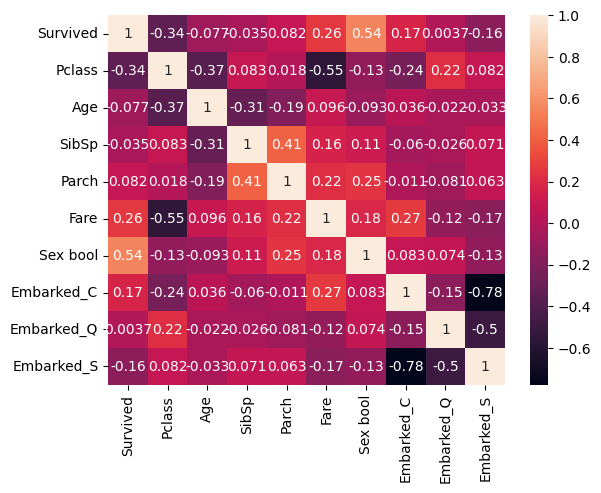

In [ ]:
# Uso de mapa de calor de seaborn para ver si hay correlación entre variables del dataset con la variable de supervivencia
sbn.heatmap(df_train.drop('Name', axis=1).corr(), annot=True)

Con este mapa de calor se puede ver que casi no hay correlación entre las variables de Embarked y la supervivencia, por lo que se puede decir que la supervivencia no depende mucho de estas variables, por lo que se podría optar por no hacerle mucho caso a esas variables. Sin embargo, hay una correlación lineal positiva con la variable 'Sex bool'que era la que habíamos definido para diferenciar entre hombre y mujer, por lo cual esta es una de las variables más importantes y definitivamente tiene que ser utilizada en el análisis. Dado que era muy común que las mujeres subieran a los botes salvavidas primero, esta correlación con la supervivencia hace sentido. Asimismo, la variable de Pclass que representa la clase económica de los pasajeros, también tiene algo de correlación, por lo que esta también debe ser tomada en cuenta. Lo mismo aplica para otras variables como edad y Fare (precio del ticket).

In [ ]:
df_test = df_test.drop(['Ticket', 'Cabin', 'PassengerId', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
df_train = df_train.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)

In [ ]:
print(df_test.shape)
df_test.head()

(418, 7)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


Ahora que ya quitamos las columnas con datos redundantes o no relevantes, procedemos a probar el modelo. Como primera opción, lo probamos tras eliminar las instancias que tengan valores faltantes en la columna de edad, y como segunda opción lo probamos tras rellenar los valores faltantes de dicha columna.

Luego de esto, el modelo que demuestre mejor precisión será el que se va a utilizar.

In [ ]:
# Eliminación de valores faltantes en la columna "Age"
df_train_limp = df_train.dropna(axis=0)

In [ ]:
# Confirmamos que ya no haya valores faltantes
count_na = df_train_limp.isna().sum()
print('Valores faltantes por columna:\n', count_na)

Valores faltantes por columna:
 Survived    0
Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
Sex bool    0
dtype: int64


In [ ]:
print(df_train_limp.shape)
df_train_limp

(714, 8)


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex bool
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,29.1250,1
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0


Como se puede observar, se han eliminado las instancias que tenían valores faltantes, pues las dimensiones del dataseframe se han reduido acorde a ello. Ahora se procede con el desarrollo y entrenamiento del modelo para evaluar su desempeño y decidir si se va a utilizar este modelo o el que se hará a continuación con rellenado de edades faltantes.

In [ ]:
# Antes hay que hacer lo mismo para el test set como lo hicimos para el train set.
df_test_limp = df_test.dropna(axis=0)

# Modelos

In [ ]:
# Hay que actualizar el test set con la nueva columna tal como hicimos con el train set.
df_test['Sex bool'] = df_test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [ ]:
# Crear columna de 'Survived' en los datos de test para predecir dicha variable con nuestro modelo
df_test['Survived'] = 0

In [ ]:
# Ahora sí, se procede con el modelo de regresión logística para predicción tras eliminar valores faltantes de edad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Modelo de regresión logística tras eliminar edades faltantes

In [ ]:
x = df_train_limp.drop(['Name', 'Survived'], axis=1)
y = df_train_limp['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Definir el espacio de búsqueda para los hiperparámetros
param_distributions = {
    'C': uniform(loc=0.1, scale=10.0),
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 1500, 2000]
}

# Crear el modelo
modelo_reg = LogisticRegression()

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelo_reg, param_distributions=param_distributions, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Ajustar la búsqueda a los datos de entrenamiento
random_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)"""

'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom scipy.stats import uniform\n\n# Definir el espacio de búsqueda para los hiperparámetros\nparam_distributions = {\n    \'C\': uniform(loc=0.1, scale=10.0),\n    \'solver\': [\'liblinear\', \'lbfgs\'],\n    \'max_iter\': [1000, 1500, 2000]\n}\n\n# Crear el modelo\nmodelo_reg = LogisticRegression()\n\n# Configurar la búsqueda aleatoria\nrandom_search = RandomizedSearchCV(estimator=modelo_reg, param_distributions=param_distributions, n_iter=20, cv=5, scoring=\'accuracy\', random_state=42)\n\n# Ajustar la búsqueda a los datos de entrenamiento\nrandom_search.fit(x_train, y_train)\n\n# Obtener los mejores hiperparámetros\nbest_params = random_search.best_params_\nprint("Mejores hiperparámetros:", best_params)'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Crear el modelo de regresión logística con los mejores hiperparámetros
modelo_reg_best = LogisticRegression(
    C=1.528668179219408,
    max_iter=2000,
    solver='lbfgs'
)

# Entrenar el modelo con los datos de entrenamiento
modelo_reg_best.fit(x_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_reg_best.predict(x_test_scaled)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.8391608391608392
Score de precisión: 0.8253968253968254
Score f1: 0.8188976377952756
Score de recall: 0.8125


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[68 11]
 [12 52]]


In [ ]:
# Reporte de clasificación
from sklearn.metrics import classification_report
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        79
           1       0.83      0.81      0.82        64

    accuracy                           0.84       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.84      0.84      0.84       143



## Modelo de árboles de decisión tras eliminar instancias faltantes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el rango de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Crear el modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Implementar Grid Search con validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Mejor combinación de hiperparámetros encontrada
print(f"Mejores hiperparámetros: {grid_search.best_params_}")"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Definir el rango de hiperparámetros\nparam_grid = {\n    \'max_depth\': [3, 5, 7, 10],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 5],\n    \'criterion\': [\'gini\', \'entropy\']\n}\n\n# Crear el modelo de árbol de decisión\ntree = DecisionTreeClassifier()\n\n# Implementar Grid Search con validación cruzada\ngrid_search = GridSearchCV(tree, param_grid, cv=5)\ngrid_search.fit(x_train, y_train)\n\n# Mejor combinación de hiperparámetros encontrada\nprint(f"Mejores hiperparámetros: {grid_search.best_params_}")'

In [ ]:
modelo_arboles = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2
).fit(x_train, y_train)

# Hacer predicciones
y_pred = modelo_arboles.predict(x_test)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.7902097902097902
Score de precisión: 0.8148148148148148
Score f1: 0.7457627118644067
Score de recall: 0.6875


In [ ]:
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[69 10]
 [20 44]]


In [ ]:
# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        79
           1       0.81      0.69      0.75        64

    accuracy                           0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



## Random Forest tras eliminar las edades faltantes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
random_forest = RandomForestClassifier().fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Definir el espacio de hiperparámetros a explorar\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# Crear el modelo de Random Forest\nrandom_forest = RandomForestClassifier(random_state=42)\n\n# Configurar la búsqueda en rejilla\ngrid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring=\'accuracy\')\n\n# Ajustar el modelo a los datos\ngrid_search.fit(x_train, y_train)\n\n# Obtener los mejores hiperparámetros\nbest_params = grid_search.best_params_\nprint("Mejores hiperparámetros encontrados:", best_params)'

In [ ]:
# Crear el modelo de Random Forest con los hiperparámetros optimizados
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42  # Para asegurar reproducibilidad
)

# Ajustar el modelo a los datos de entrenamiento
random_forest.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = random_forest.predict(x_test)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.7902097902097902
Score de precisión: 0.8035714285714286
Score f1: 0.75
Score de recall: 0.703125


In [ ]:
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[68 11]
 [19 45]]


In [ ]:
# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        79
           1       0.80      0.70      0.75        64

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



## Rellenado de edades faltantes

In [ ]:
## Rellenado de valores faltantes en la columna "Age":
# Imputación basada en grupos rellenando los valores faltantes de manera condicional (en este caso según la clase o el género) mediante el
# agrupamiento de estas variables consideradas para aplicar el rellenado en base a esto y sea de manera más informada y no tan sesgada ni aleatoria.

#df_train['Age'] = df_train.groupby(['Pclass', 'Sex bool'])['Age'].transform(lambda x: x.fillna(x.median()))
#df_test['Age'] = df_test.groupby(['Pclass', 'Sex bool'])['Age'].transform(lambda x: x.fillna(x.median()))

from sklearn.impute import KNNImputer
# En este segundo intento de imputación de los datos de edad se hará con KNN
imputacion = KNNImputer(n_neighbors=5)
df_train['Age'] = imputacion.fit_transform(df_train[['Age']])

In [ ]:
# Imprimimos el dataframe tras el rellenado para confirmar que sus dimensiones se conservaron y que no se eliminaron datos como en la primera solución
print(df_train.shape)
df_train

(891, 8)


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex bool
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,1
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,0


In [ ]:
count_na = df_train['Age'].isna().sum()
print('Valores faltantes en columna "Age":\n', count_na)

Valores faltantes en columna "Age":
 0


Como se puede observar, ya no hay valores faltantes, por lo que el rellenado de las edades faltantes fue realizado con éxito. Ahora se procede con el desarrollo y entrenamiento del modelo para evaluar su desempeño y decidir si se va a utilizar este modelo o el que se hizo anteriormente con eliminación de instancias faltantes.

## Modelo de regresión logística tras rellenado de edades faltantes

In [ ]:
from sklearn.preprocessing import StandardScaler
x = df_train.drop(['Name', 'Survived'], axis=1)
y = df_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Crear el modelo de regresión logística con los mejores hiperparámetros
modelo_reg_best = LogisticRegression(
    C=1.528668179219408,
    max_iter=2000,
    solver='lbfgs'
)

# Entrenar el modelo con los datos de entrenamiento
modelo_reg_best.fit(x_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_reg_best.predict(x_test_scaled)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.7892376681614349
Score de precisión: 0.7011494252873564
Score f1: 0.7218934911242605
Score de recall: 0.7439024390243902


In [ ]:
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[115  26]
 [ 21  61]]


In [ ]:
# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       141
           1       0.70      0.74      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



## Modelo de árboles de decisión tras rellenado de edades

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y)
modelo_arboles = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2
).fit(x_train, y_train)

# Hacer predicciones
y_pred = modelo_arboles.predict(x_test)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.8071748878923767
Score de precisión: 0.8305084745762712
Score f1: 0.6950354609929077
Score de recall: 0.5975609756097561


In [ ]:
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[131  10]
 [ 33  49]]


In [ ]:
# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       141
           1       0.83      0.60      0.70        82

    accuracy                           0.81       223
   macro avg       0.81      0.76      0.78       223
weighted avg       0.81      0.81      0.80       223



## Random Forest con los datos rellenados de la edad

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42  # Para asegurar reproducibilidad
)

# Ajustar el modelo a los datos de entrenamiento
random_forest.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = random_forest.predict(x_test)

### Evaluación de exactitud y precisión del modelo

In [ ]:
# Métricas
print('Score de exactitud:', accuracy_score(y_test, y_pred))
print('Score de precisión:', precision_score(y_test, y_pred))
print('Score f1:', f1_score(y_test, y_pred))
print('Score de recall:', recall_score(y_test, y_pred))

Score de exactitud: 0.8324022346368715
Score de precisión: 0.8545454545454545
Score f1: 0.7580645161290324
Score de recall: 0.6811594202898551


In [ ]:
# Matriz de confusión
mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{mat}')

Confusion Matrix:
[[102   8]
 [ 22  47]]


In [ ]:
# Reporte de clasificación
reporte = classification_report(y_test, y_pred)
print(f'Classification Report:\n{reporte}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

